<a href="https://colab.research.google.com/github/hesamcs/AI/blob/main/noise_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**:دیتاست**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
data = pd.read_csv('Microsoft_Stock.csv')
data.Date = pd.to_datetime(data.Date)
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


**پیش پردازش**


Text(0, 0.5, 'Close')

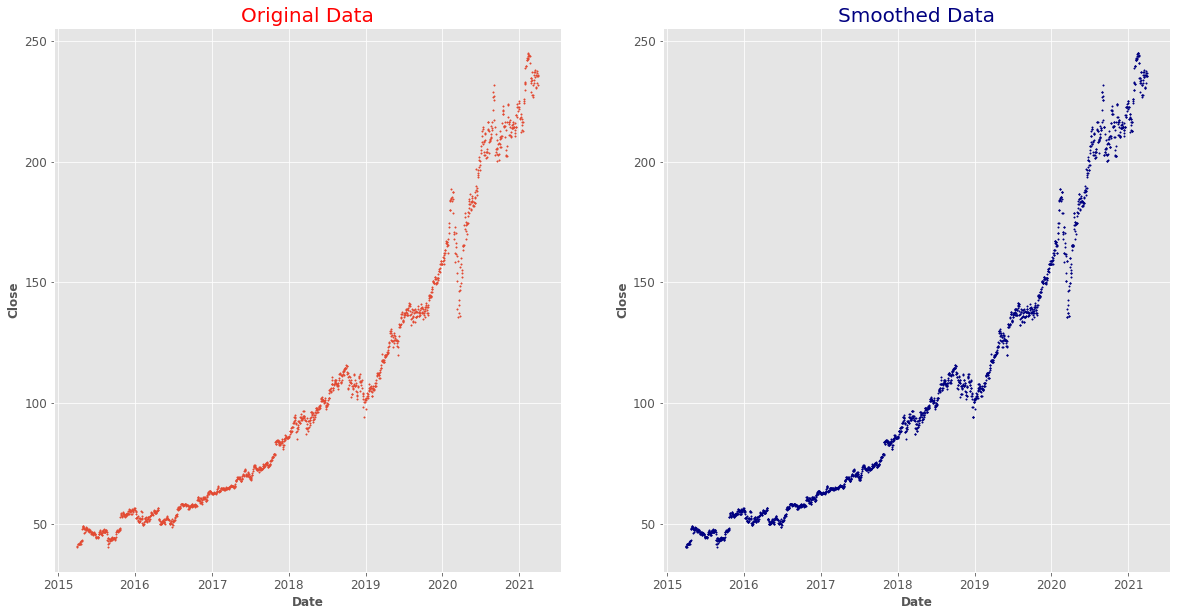

In [ ]:
start_date = data.Date.loc[0] #
end_date = data.Date.loc[len(data)-1]
start_year = start_date.year
start_month =  start_date.month
start_day = start_date.day
end_year = end_date.year
end_month =  end_date.month
end_day = end_date.day
number_of_days = abs((end_date-start_date).days)
# print(start_date)
start_date = datetime.date(start_date.year, start_date.month, start_date.day)
# print(start_date)
date_list = []
for day in range(number_of_days):
    a_date = (start_date + datetime.timedelta(days = day)).isoformat()
    date_list.append(a_date)
# print(date_list)
date_list = pd.to_datetime(date_list)
new_data = pd.DataFrame({'Date':date_list})
# new_data.head()
x = new_data.Date
# print(x)
old_x = data.Date
# print(old_x)
y = []
for i in range(len(x)):
    x_i = x.loc[i]
    diff_list = []
    for j in range(len(data)):
        diff_list.append(abs((x_i-old_x.loc[j]).days))
    diff_list = np.array(diff_list)
    y.append(data.Close[diff_list.argmin()])
# print(y)
        
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Data',color='red',fontsize=20)
plt.scatter(data.Date,data.Close,s=2)
plt.xlabel('Date')
plt.ylabel('Close')
plt.subplot(1,2,2)
plt.title('Smoothed Data',color='navy',fontsize=20)

plt.scatter(x,y,s=2,color='navy')
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Price')

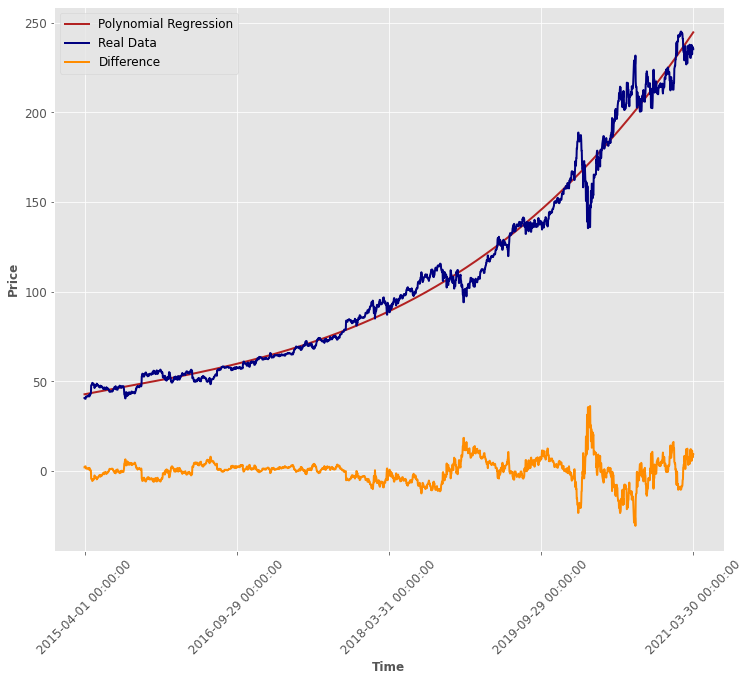

In [ ]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(new_data.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
# y = 1 * x_0 + 2 * x_1 + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick')
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,reg.predict(X)-y,label='Difference',color='darkorange')
plt.legend()
plt.xticks(x[idx],x[idx],rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')

**الگوریتم حذف نویز**


2191


Text(0, 0.5, 'Fourier Amplitude')

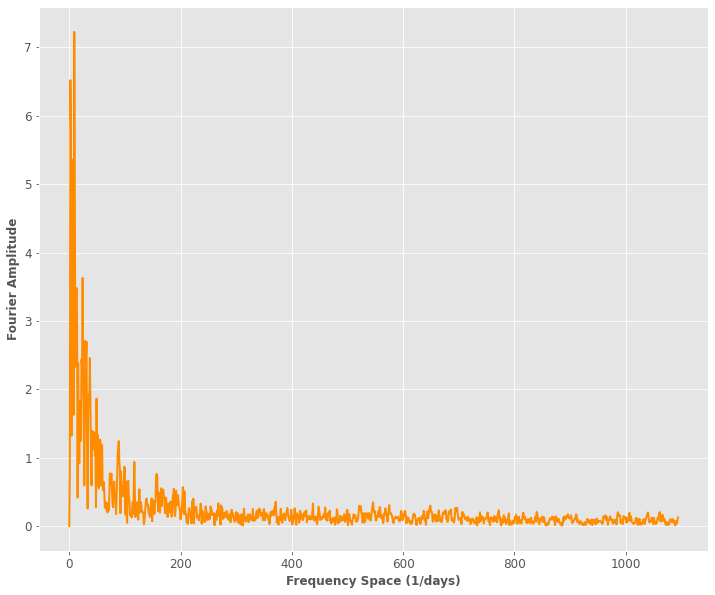

In [ ]:
signal = reg.predict(X)-y
s1=reg.predict(X)-y
# print(signal)
signal = signal-signal.mean()
# print(s1-signal)
# print(signal.mean())
fft_signal =np.abs( np.fft.fft(signal))
print(len(fft_signal))
plt.plot(fft_signal[0:int(len(signal)/2.)]/500,color='darkorange')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

#remove noise

### plot diagram of fft 

[False  True  True ...  True  True  True]


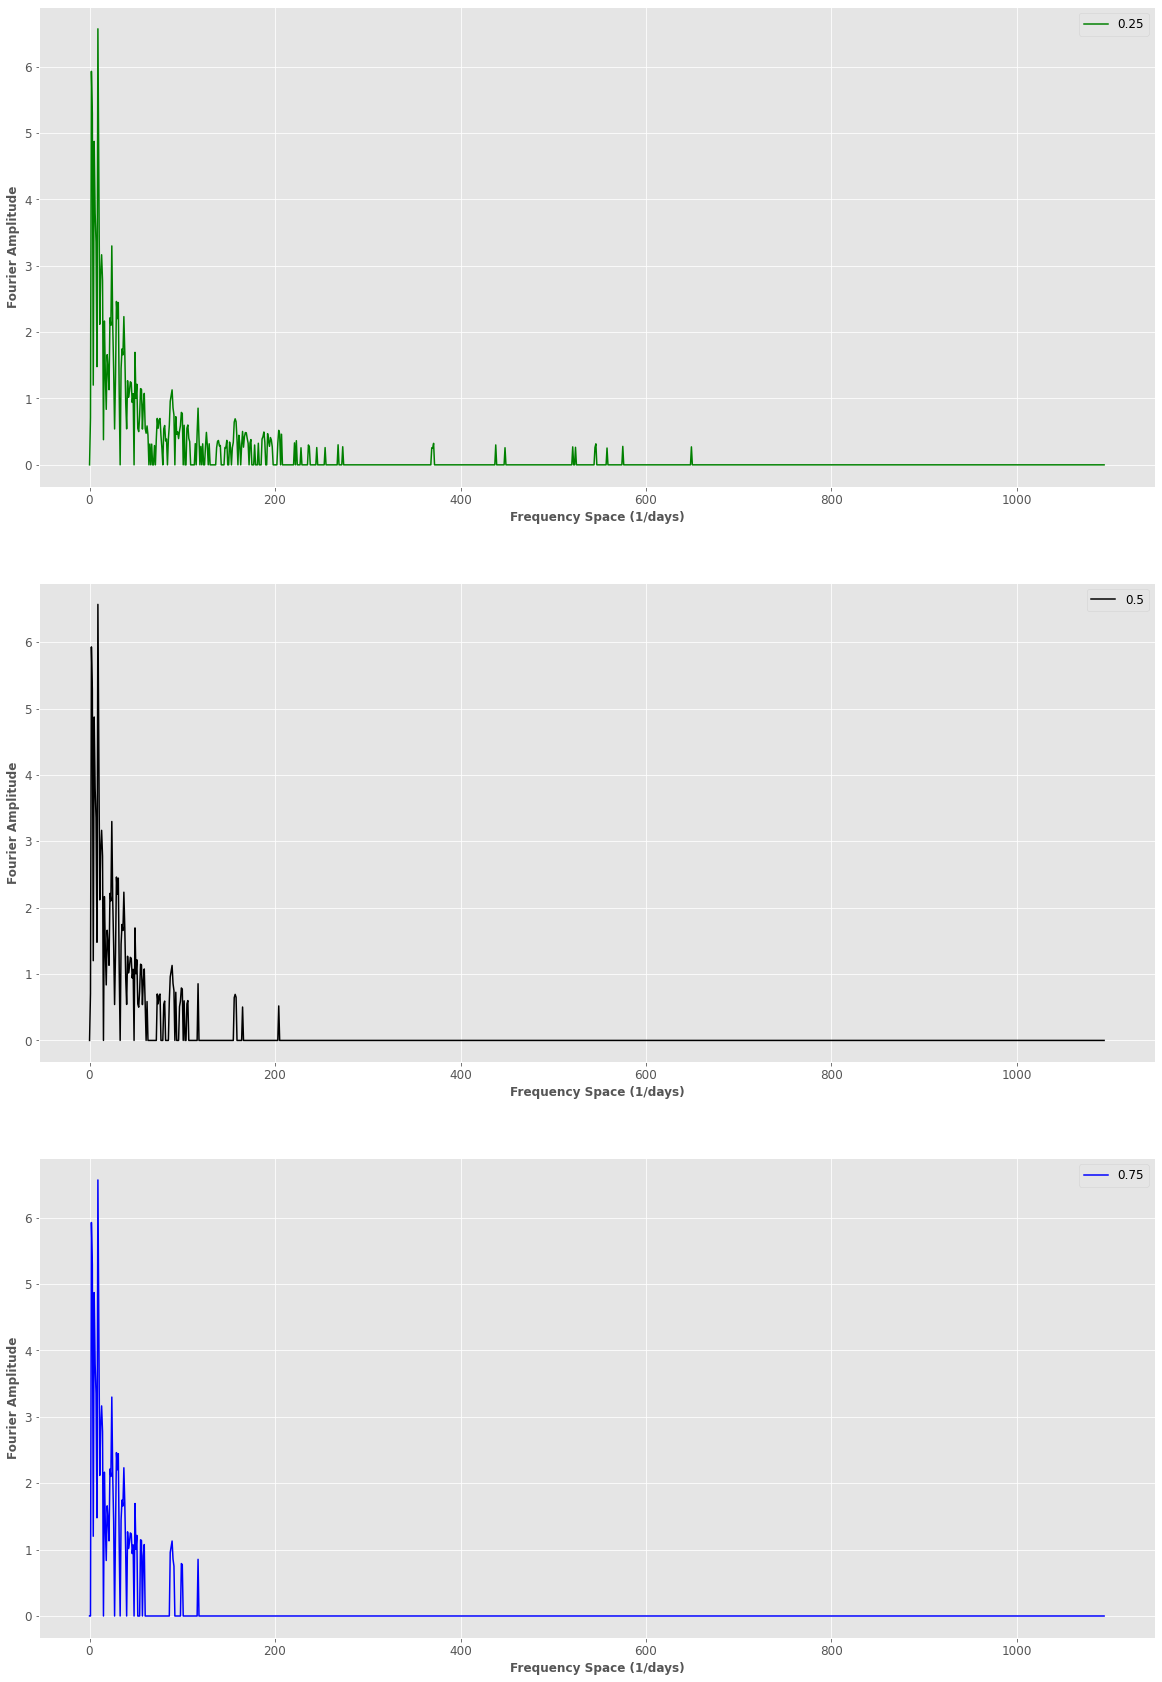

In [ ]:
from scipy.fft import fft, ifft
threshold=fft_signal/550>0.25
print(threshold)
fft_signal_new=(fft_signal)*threshold
# ffilt = ifft(fft_signal_new)


threshold1=(fft_signal)/550>0.5
fft_signal_new1=(fft_signal)*threshold1


threshold2=(fft_signal)/550>0.75
fft_signal_new2=(fft_signal)*threshold2


fig,axs = plt.subplots(3,1)
fig.set_size_inches(20, 30)
plt.sca(axs[0])
plt.plot(np.absolute(fft_signal_new[0:int(len(signal)/2.)])/550,color='g',linewidth=1.5,label='0.25')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.legend()

plt.sca(axs[1])
plt.plot(np.absolute(fft_signal_new1[0:int(len(signal)/2.)])/550,color='k',linewidth=1.5,label='0.5')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.legend()

plt.sca(axs[2])
plt.plot(np.absolute(fft_signal_new2[0:int(len(signal)/2.)])/550,color='b',linewidth=1.5,label='0.75')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.legend()

plt.show()


### plot ifft

Text(0, 0.5, 'Fourier Amplitude')

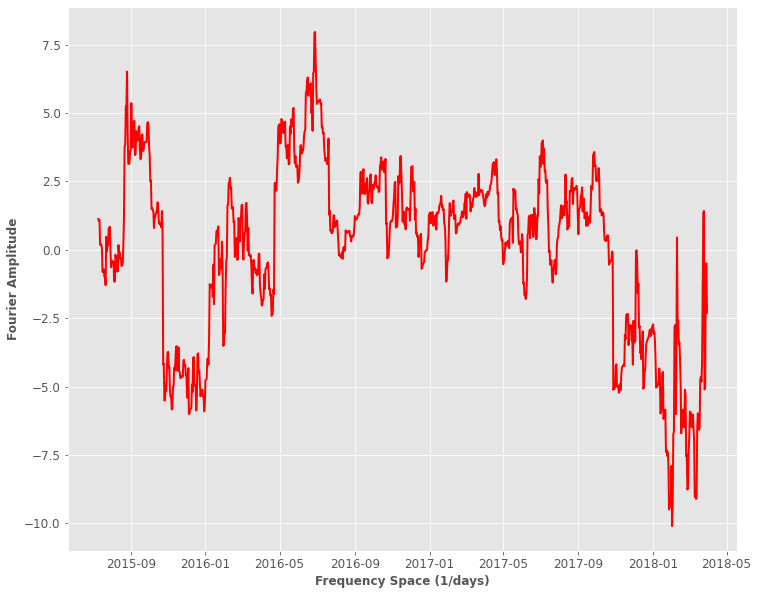

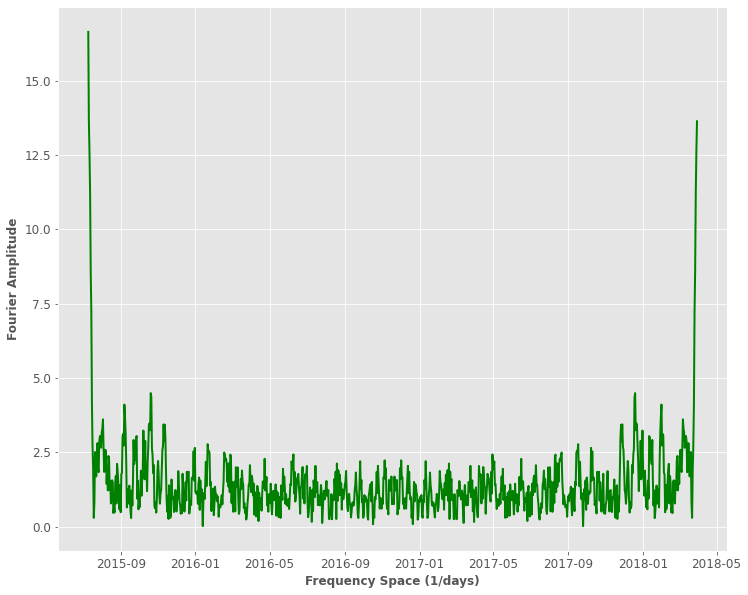

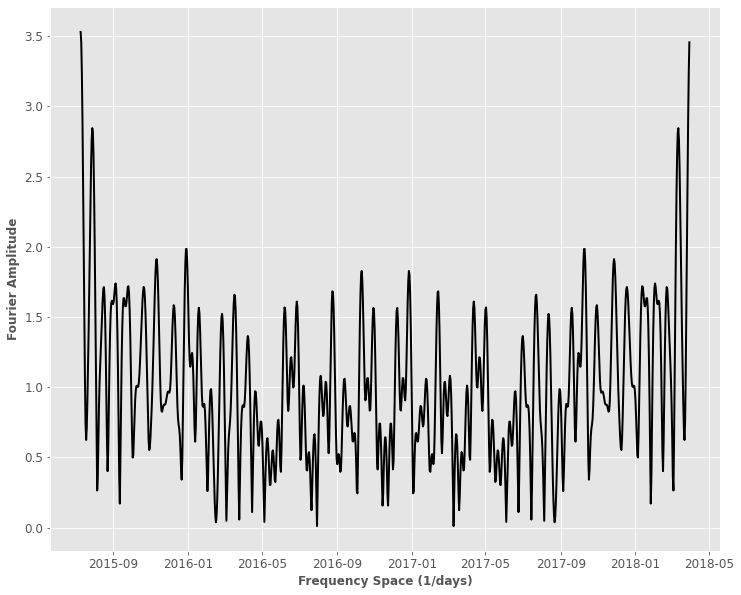

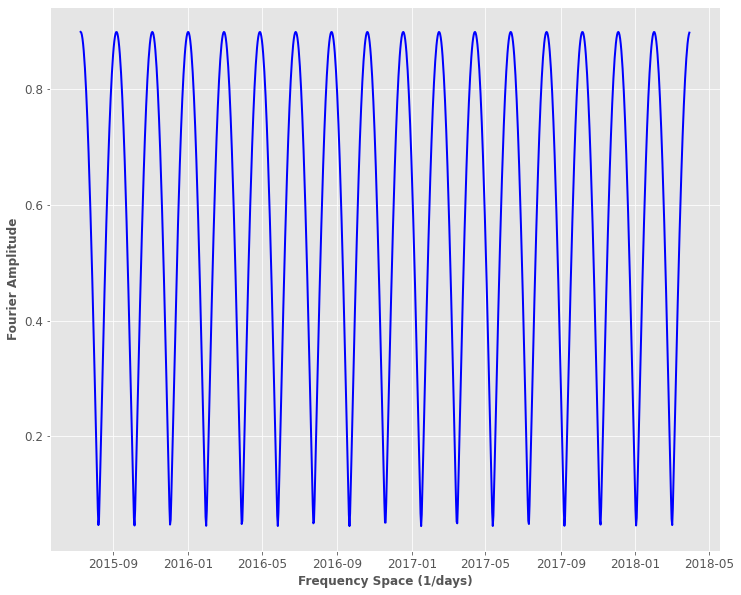

In [ ]:
plt.figure(1)
plt.plot(x[100:int(len(signal)/2.)],signal[100:int(len(signal)/2.)],color='red')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(2)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new[100:int(len(signal)/2.)]))),color='g')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(3)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new1[100:int(len(signal)/2.)]))),color='k')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(4)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new2[100:int(len(signal)/2.)]))),color='b')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

Text(0, 0.5, 'Fourier Amplitude')

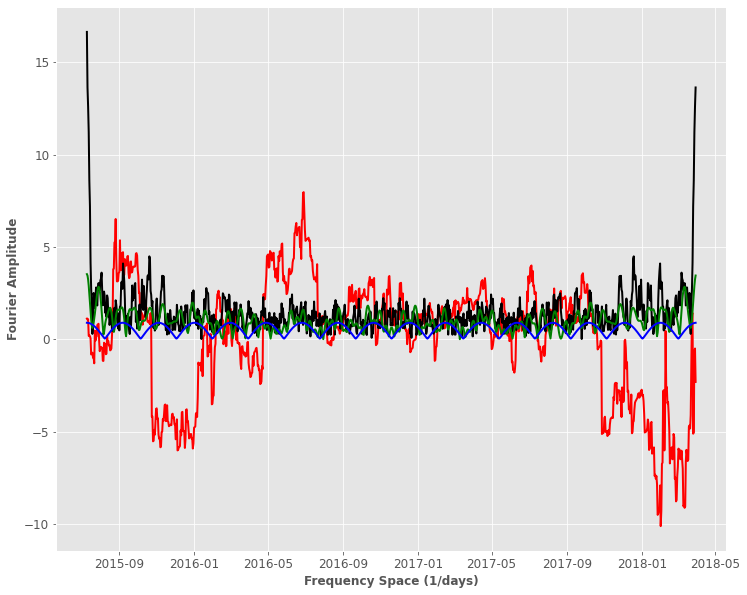

In [ ]:
plt.figure(1)
plt.plot(x[100:int(len(signal)/2.)],signal[100:int(len(signal)/2.)],color='red')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(1)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new[100:int(len(signal)/2.)]))),color='k')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(1)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new1[100:int(len(signal)/2.)]))),color='g')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.figure(1)
plt.plot(x[100:int(len(signal)/2.)],np.absolute((np.fft.ifft(fft_signal_new2[100:int(len(signal)/2.)]))),color='b')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

# Correlation Coefficient
-1<p<1 my target is p=0 because p=0 show me i arrived to clean signal

In [ ]:
mx=max(fft_signal)
m=[]
for i in range(int(np.floor(mx))):
    threshold=fft_signal>i
    fft_signal_new=(fft_signal)*threshold
    ffilt = ifft(fft_signal_new)
    diff=np.absolute(signal-ffilt)
    m.append(np.min(np.absolute((np.corrcoef(diff,np.abs(ffilt))))))


### find optimum

In [ ]:
optimum_threshold=np.argmin(m)
optimum_correlation=m[optimum_threshold]

In [ ]:
print("optimum threshold is = ",optimum_threshold)
print("optimum correlation is = ",optimum_correlation)

optimum threshold is =  3261
optimum correlation is =  0.10638430996185508


### test for optimum

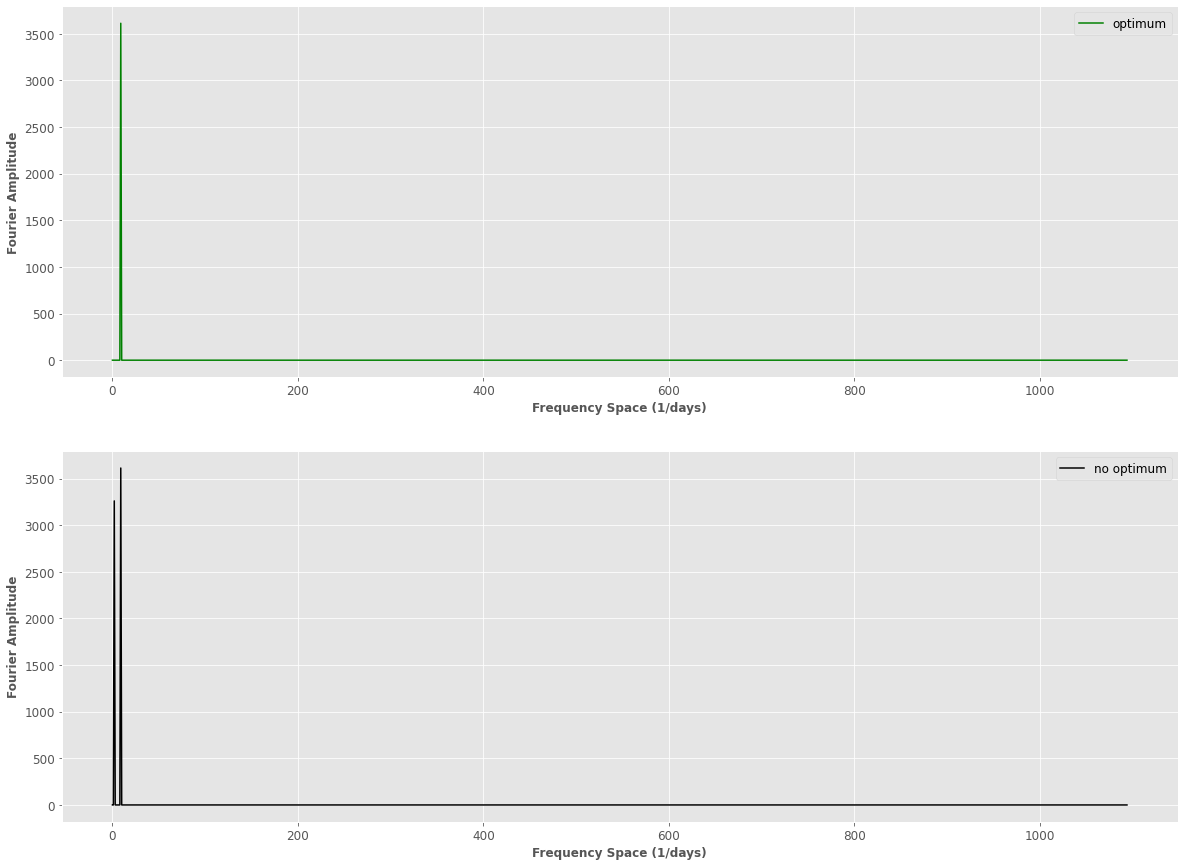

In [ ]:
threshold_optimum=fft_signal>optimum_threshold
fft_signal_new_threshold=(fft_signal)*threshold_optimum

threshold_no_optimum=fft_signal>(optimum_threshold-1)
fft_signal_no_threshold=(fft_signal)*threshold_no_optimum

fig,axs = plt.subplots(2,1)
fig.set_size_inches(20, 15)
plt.sca(axs[0])
plt.plot(np.absolute(fft_signal_new_threshold[0:int(len(signal)/2.)]),color='g',linewidth=1.5,label='optimum')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.legend()

plt.sca(axs[1])
plt.plot(np.absolute(fft_signal_no_threshold[0:int(len(signal)/2.)]),color='k',linewidth=1.5,label='no optimum')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')
plt.legend()

plt.show()


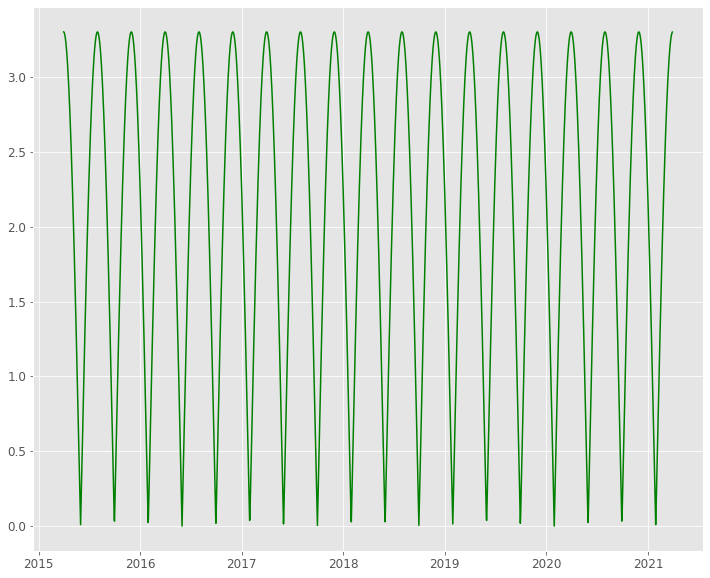

In [ ]:
plt.plot(x,np.absolute(np.fft.ifft(fft_signal_new_threshold)),color='g',linewidth=1.5,label='clean diagram')